In [3]:
%reset -f

#2022July8 linear regression power formula, KML file added

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.optimize import minimize

np.set_printoptions(suppress=True)  #suppress scientific notation numpy
pd.set_option("display.max_columns",None) #show all columns

In [4]:
df_county1=pd.read_csv('dataset\wheat_county_filled.csv')

x1=df_county1[['Literatcy1HS2above']].to_numpy().ravel()
x2=df_county1[['ProvinceCode']].to_numpy().ravel()
x3=df_county1[['CountyCode']].to_numpy().ravel()
x4=df_county1[['NumFarms']].to_numpy().ravel()
x5_region=df_county1[['Region']].to_numpy().ravel()
x6_lat=df_county1[['LatitudeDegree']].to_numpy().ravel()
x7_long=df_county1[['LongitudeDegree']].to_numpy().ravel()
x8=df_county1[['source1well2surface']].to_numpy().ravel()
x9=df_county1[['network1traditional2modern']].to_numpy().ravel()
x10_warmcold=df_county1[['Warm0Cold1']].to_numpy().ravel()
x11_drywet=df_county1[['Dry0Semi05Wet1']].to_numpy().ravel()
x12=df_county1[['croparea_ha']].to_numpy().ravel()
x13_ecwat=df_county1[['ECwatirrig_dsm']].to_numpy().ravel()
x14=df_county1[['SoilSalinitydSm']].to_numpy().ravel()
x15=df_county1[['variety1chaI2chamII3Pish4SirMih5Oth']].to_numpy().ravel()
x16_soil=df_county1[['SoilTexture1Light2Normal3Heavy']].to_numpy().ravel()
x17_gd=df_county1[['GrowthLength150200_123']].to_numpy().ravel()
x18=df_county1[['Irrig1surf2sprinkl3drip']].to_numpy().ravel()
x19=df_county1[['irrig_depth_avg']].to_numpy().ravel()
x20_numirrig=df_county1[['number_of_irrig']].to_numpy().ravel()
x21_volirrig=df_county1[['water_vol_m3ha']].to_numpy().ravel()
x22_effrain=df_county1[['effective_rain_fao_currentyear_mm']].to_numpy().ravel()
x23=df_county1[['effective_rain_10year_fao075p_mm']].to_numpy().ravel()
x24=df_county1[['WatNeedNationalBook_mm']].to_numpy().ravel()
x25=df_county1[['WaterNeedBookmm']].to_numpy().ravel()
x26=df_county1[['Et_clim_data_this_year_mm']].to_numpy().ravel()
x27=df_county1[['ET_clim_10year_mm']].to_numpy().ravel()
x28_leech=df_county1[['leeching_need_percent']].to_numpy().ravel()
x29=df_county1[['water_efficiency_kgm3']].to_numpy().ravel()
x30=df_county1[['efficiency_irrig_effectiveraincurrentyear_kgm3']].to_numpy().ravel()
x31=df_county1[['efficiency_irrig_effectiverain10year_kgm3']].to_numpy().ravel()
y=df_county1[['yield_kgha']].to_numpy().ravel()




display(df_county1)

,County,Province,Region,NumFarms,ProvinceCode,CountyCode,Warm0Cold1,Dry0Semi05Wet1,Literatcy1HS2above,LongitudeDegree,LatitudeDegree,source1well2surface,network1traditional2modern,ECwatirrig_dsm,croparea_ha,SoilTexture1Light2Normal3Heavy,SoilSalinitydSm,variety1chaI2chamII3Pish4SirMih5Oth,GrowthLength150200_123,Irrig1surf2sprinkl3drip,irrig_depth_avg,number_of_irrig,water_vol_m3ha,effective_rain_fao_currentyear_mm,effective_rain_10year_fao075p_mm,WatNeedNationalBook_mm,WaterNeedBookmm,Et_clim_data_this_year_mm,ET_clim_10year_mm,leeching_need_percent,yield_kgha,water_efficiency_kgm3,efficiency_irrig_effectiveraincurrentyear_kgm3,efficiency_irrig_effectiverain10year_kgm3
0,ParsabadMoqan,Ardebil,1,6,1,1,1,1,2.0,47.861667,39.563333,1,2,1,16,3,2,4,3.0,1,109,9.0,6107,72,128,283,593,554,487,3,5737,1.01,0.89,0.81
1,Behbahan,Khuzestan,3,31,2,2,0,1,1.0,50.226517,30.588919,1,2,2,8,2,4,4,2.0,2,69,8.0,4090,127,158,514,595,398,450,6,3935,1.00,0.76,0.72
2,Bavi,Khuzestan,3,2,2,3,0,0,1.0,48.891625,31.545014,1,2,2,95,3,3,2,2.0,1,82,6.0,4532,70,112,412,599,398,615,5,3950,0.91,0.79,0.73
3,Ahvaz,Khuzestan,3,2,2,4,0,0,1.0,48.501931,31.176097,1,1,2,65,1,5,2,2.0,1,91,5.0,4563,75,118,412,599,398,626,7,5850,1.30,1.11,1.03
4,Hamidieh,Khuzestan,3,2,2,5,0,0,2.0,48.459403,31.419514,1,2,1,134,2,3,4,2.0,1,108,5.0,5415,73,120,412,599,398,608,4,4600,0.86,0.75,0.70
5,DashtAzadegan,Khuzestan,3,6,2,6,0,0,1.0,48.368796,31.497583,1,1,2,28,2,6,2,2.0,1,119,5.0,5605,75,121,322,593,398,664,4,4467,0.80,0.71,0.66
6,Shush,Khuzestan,3,10,2,7,0,0,1.0,48.198197,32.243513,1,2,1,15,2,3,4,1.0,1,103,8.0,5724,107,144,322,592,427,414,4,5000,0.97,0.78,0.74
7,Kharkheh,Khuzestan,3,2,2,8,0,0,1.0,48.399980,31.947903,2,2,2,18,2,3,2,1.0,2,140,8.0,7328,123,170,322,592,370,370,5,3546,0.49,0.41,0.39
8,Jovain,KhorasanRazavi,2,6,3,9,1,1,2.0,57.354564,36.678036,2,2,1,15,2,2,4,3.0,2,669,8.0,5352,113,129,635,618,709,775,2,4300,0.82,0.68,0.66
9,Neishabur,KhorasanRazavi,2,12,3,10,1,0,1.0,58.645417,36.321667,2,1,2,30,2,3,3,3.0,1,75,7.0,4697,207,169,569,612,708,629,7,4675,1.10,0.71,0.76


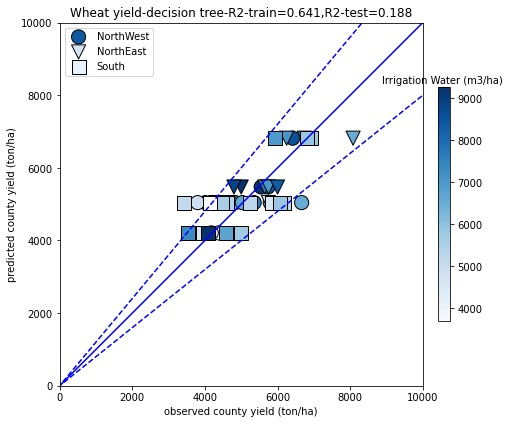

In [5]:
x=np.c_[x6_lat,x7_long]
x=np.c_[x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig,x21_volirrig,x22_effrain,x28_leech]


xmin=np.min(x,axis=0)
xmax=np.max(x,axis=0)
ymin=np.min(y)
ymax=np.max(y)
X=(x-xmin)/(xmax-xmin)
Y=(y-ymin)/(ymax-ymin)

N=41
ind=np.random.choice(N,N)<N*0.7


regressor_lin1 = LinearRegression()
regressor_lin1=DecisionTreeRegressor(max_depth=4,min_samples_leaf=5)
#regressor_lin1 = MLPRegressor(hidden_layer_sizes=10,max_iter=500000, activation='tanh')
regressor_lin1.fit(X[ind],Y[ind])
#regressor_lin1.fit(X,X)
Y_hat_lin1 = regressor_lin1.predict(X)

y_hat_lin1=Y_hat_lin1*(ymax-ymin)+ymin

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
#marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South',edgecolors='k')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
#ax.set_title("Wheat yield-DecisionTree-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Wheat yield-decision tree-R2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\wheat-county_yield_decision_tree.png', dpi=300)

In [6]:
max(x21_volirrig)

9270

[ 0.514 -0.086 -0.05   0.007  0.337  0.276  0.139  0.     0.   ]


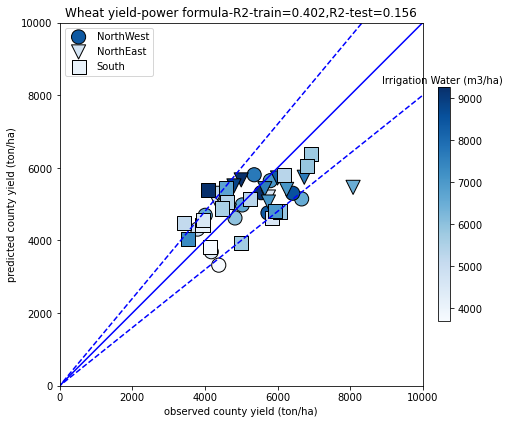

In [7]:
# parameters:
#     x10_warmcold
#     x11_drywet
#     x13_ecwat
#     x16_soil
#     x17_gd
#     x20_numirrig
#     x21_volirrig
#     x22_effrain
#     x28_leech


N=41
ind=np.random.choice(N,N)<N*0.7

x0=np.zeros((N,1)).ravel()
x=np.c_[x13_ecwat,x20_numirrig,x16_soil,x17_gd,x21_volirrig,x6_lat,x7_long]

a0=[1,0,0,0,0,0,0,0,0]

# a0      ec     n-irr   soil-t  gd    volirr  lat
#[ 0.61  -0.065 -0.145  0.193  0.323  0.284  0.097  0.     0.   ]

def func1(a,x): 
    x1=(x[:,0]+0.5)/8 #ecwat
    x2=x[:,1]/12 #numirrig
    x3=x[:,2]/3 #soiltexture
    x4=x[:,3]/3 #gdays    
    x5=x[:,4]/10000 #volirrig
    x6=42-x[:,5]
    x7=62-x[:,6]
    
    temp=8000*a[0]*x1**a[1]*x2**a[2]*x3**a[3]*x4**a[4]*x5**a[5]*x6**a[6]
    
    return temp

func2= lambda a: np.dot(y[ind]-func1(a,x[ind]),y[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South',edgecolors='k')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
#ax.set_title("Wheat yield-Power Formula-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Wheat yield-power formula-R2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\wheat-county_yield_power_formula.png', dpi=300)

$\frac{Yield}{8000 kg/ha} = 
0.824       
\times {(\frac{ECwat+0.5}{8 dS/m})}        ^{-0.065}
\times {(\frac{soil_{1=light,3=heavy}}{3})} ^{0.131}
\times {(\frac{x=1_{day<150},x=3_{day>200}}{3})} ^{0.244} 
\times {(\frac{{events}_{irrigation}}{12 times})}  ^{-0.087}
\times {(\frac{Irrig_{Wat}}{10000 m^3/ha})}     ^{0.370} 
\times {(\frac{Rain_{effective}}{350 mm})}     ^{0.072}
\times {(1+\frac{leech_{percent}}{100})}     ^{-0.017}$



[ 0.764  0.     0.    -0.084  0.108  0.215  0.     0.273  0.071  0.   ]


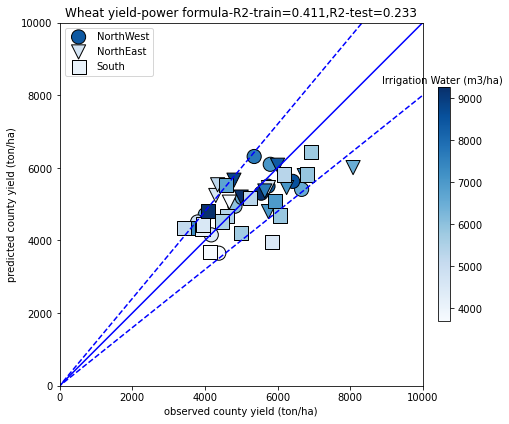

In [8]:
# parameters:
#     x10_warmcold
#     x11_drywet
#     x13_ecwat
#     x16_soil
#     x17_gd
#     x20_numirrig
#     x21_volirrig
#     x22_effrain
#     x28_leech


N=41
ind=np.random.choice(N,N)<N*0.7

x0=np.zeros((N,1)).ravel()
x=np.c_[x0,x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig,x21_volirrig,x22_effrain,x28_leech,x5_region]


a0 = [0.821, #intercept
      0.05, #warmcold
      -0.046, #drywet
      -0.034, #ecwat
      0.179, #soil_texture
      0.193, #gd
      -0.064, #numirrig
     0.252, #volirrig
     0.091, #effrain
     -0.055] #leech

#           x1          x2       x3       x4            x5       x6         x7       x8        x9
# intercept warmcold   drywet    ecwat   soil_texture  gd        numirrig   volirrig effrain   leech
a0=[0.821,  0.05     ,-0.046,   -0.034,  0.179,        0.193,   -0.064,    0.252    ,0.091,   -0.055]
a0=[0.927 , 0.00,    0.000,    0.000  ,0.179 ,        0.264,     0.000  ,  0.262 ,   0.102 ,  0.000]

def func1(a,x): 
    x1=(x[:,1]+0.5)/1.5 #warmcold
    x2=(x[:,2]+0.5)/1.5 #drywet
    x3=(x[:,3]+0.5)/8 #ecwat
    x4=x[:,4]/3 #soiltexture
    x5=x[:,5]/3 #gdays
    x6=x[:,6]/12 #numirrig
    x7=x[:,7]/10000 #volirrig
    x8=x[:,8]/350 #effrain
    x9=1+x[:,9]/100 #leech
    
    #temp=8000*a[0]*x3**a[3]*x4**a[4]*x5**a[5]*x6**a[6]*x7**a[7]*x8**a[8]*x9**a[9]
    temp=8000*a[0]*x3**a[3]*x4**a[4]*x5**a[5]*x7**a[7]*x8**a[8]
    
    return temp

func2= lambda a: np.dot(y[ind]-func1(a,x[ind]),y[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South',edgecolors='k')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
#ax.set_title("Wheat yield-Power Formula-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Wheat yield-power formula-R2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\wheat-county_yield_power_formula.png', dpi=300)

[0.835 0.168 0.3   0.215 0.    0.    0.    0.    0.    0.    0.   ]


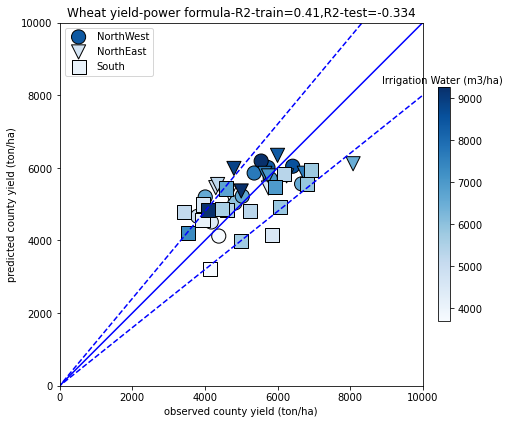

In [9]:
# parameters:
#     x10_warmcold
#     x11_drywet
#     x13_ecwat
#     x16_soil
#     x17_gd
#     x20_numirrig
#     x21_volirrig
#     x22_effrain
#     x28_leech


N=41
ind=np.random.choice(N,N)<N*0.7

x0=np.zeros((N,1)).ravel()
x=np.c_[x0,x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig
        ,x21_volirrig,x22_effrain,x28_leech,x5_region,x6_lat,x7_long]


a0=[0.821,  0.05     ,-0.046,   -0.034,  0.179,        0.193,   -0.064,    0.252    ,0.091,   -0.055]
a0=[ 0.76  ,0 ,0 , 0.   ,  0.  ,   0.   ,  0.  ,   0.  ,   0.   ,  0. ,0  ]

#a0     soilt  gd    volirr      
#[0.822 0.139 0.214 0.245

def func1(a,x): 

    x4=x[:,4]/3 #soiltexture
    x5=x[:,5]/3 #gdays
    x7=x[:,7]/10000 #volirrig


    
    temp=8000*a[0]*x4**a[1]*x5**a[2]*x7**a[3]
    
    return temp

func2= lambda a: np.dot(y[ind]-func1(a,x[ind]),y[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
y_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
#ax.scatter(y, y_hat_lin1, color = 'red')
marker_=['o','v','s']
m=ax.scatter(y[x5_region==1], y_hat_lin1[x5_region==1], 
             marker='o',c=x21_volirrig[x5_region==1],cmap='Blues',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(y[x5_region==2], y_hat_lin1[x5_region==2], 
             marker='v',c=x21_volirrig[x5_region==2],cmap='Blues',s=200,label='NorthEast',edgecolors='k')
m=ax.scatter(y[x5_region==3], y_hat_lin1[x5_region==3], 
             marker='s',c=x21_volirrig[x5_region==3],cmap='Blues',s=200,label='South',edgecolors='k')
cbar=fig.colorbar(m,fraction=0.03, pad=0.04)
cbar.set_label('Irrigation Water (m3/ha)', rotation=0,labelpad=-40, y=1.05,)
ax.plot(np.array([0,10000]),np.array([0,10000]), 'b-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'b--')
ax.legend()
ax.set_xlabel('observed county yield (ton/ha)')
ax.set_ylabel('predicted county yield (ton/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
#ax.set_title("Wheat yield-Power Formula-R2="+str(np.round(r2_score(y,y_hat_lin1),3)))
R2_train=np.round(r2_score(y[ind],y_hat_lin1[ind]),3)
R2_test=np.round(r2_score(y[~ind],y_hat_lin1[~ind]),3)
ax.set_title("Wheat yield-power formula-R2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\wheat-county_yield_power_formula.png', dpi=300)

$\frac{Yield}{8000 kg/ha} = 
0.877       
\times {(\frac{ECwat+0.5}{8 dS/m})}        ^{-0.035}
\times {(\frac{soil_{1=light,3=heavy}}{3})} ^{0.135}
\times {(\frac{x=1_{day<150},x=3_{day>200}}{3})} ^{0.257} 
\times {(\frac{Irrig_{Wat}}{10000 m^3/ha})}     ^{0.260} 
\times {(\frac{Rain_{effective}}{350 mm})}     ^{0.107}$



[ 0.84   0.136 -0.087  0.36   0.581  0.171  0.     0.     0.     0.
  0.     0.     0.   ]


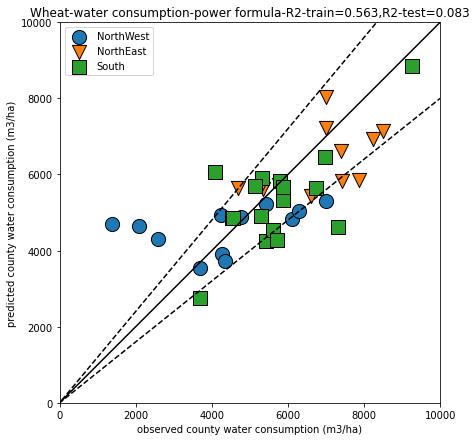

In [10]:



N=41
ind=np.random.choice(N,N)<N*0.7

x0=np.zeros((N,1)).ravel()
x=np.c_[x0,x10_warmcold,x11_drywet,x13_ecwat,x16_soil,x17_gd,x20_numirrig
        ,x21_volirrig,x22_effrain,x28_leech,x5_region,x6_lat,x7_long]
yy=x21_volirrig

a0 = [0.821, #intercept
      0.05, #warmcold
      -0.046, #drywet
      -0.034, #ecwat
      0.179, #soil_texture
      0.193, #gd
      -0.064, #numirrig
     0.252, #volirrig
     0.091, #effrain
     -0.055] #leech

#           x1          x2       x3       x4            x5       x6         x7       x8        x9
# intercept warmcold   drywet    ecwat   soil_texture  gd        numirrig   volirrig effrain   leech
a0=[0.821,  0.05     ,-0.046,   -0.034,  0.179,        0.193,   -0.064,    0.252    ,0.091,   -0.055]
a0=[0.927 , 0.00,    0.000,    0.000  ,0 ,        0,     0.000  ,  0 ,  0 ,  0.000,0,0,0]

 #intercept  ecwat  soiltex   gd    numir   lat
#[ 0.962     0.121  -0.143   0.058   0.565  0.069  

def func1(a,x): 
    x3=(x[:,3]+0.5)/8 #ecwat
    x4=x[:,4]/3 #soiltexture
    x5=x[:,5]/3 #gdays
    x6=x[:,6]/12 #numirrig
    x8=x[:,8]/350 #effrain
    x9=1+x[:,9]/100 #leech
    x11=41-x[:,11] #lat
    x12=61-x[:,12] #long
    
    temp=8000*a[0]*x3**a[1]*x4**a[2]*x5**a[3]*x6**a[4]*x11**a[5]
    #temp=8000*a[0]*x3**a[3]*x4**a[4]*x5**a[5]*x8**a[8]
    
    return temp

func2= lambda a: np.dot(yy[ind]-func1(a,x[ind]),yy[ind]-func1(a,x[ind]))/2500
res = minimize(func2,a0)
a0=np.round(res.x,3)
print(a0)
yy_hat_lin1=func1(a0,x)

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
m=ax.scatter(yy[x5_region==1], yy_hat_lin1[x5_region==1], marker='o',s=200,label='NorthWest',edgecolors='k')
m=ax.scatter(yy[x5_region==2], yy_hat_lin1[x5_region==2], marker='v',s=200,label='NorthEast',edgecolors='k')
m=ax.scatter(yy[x5_region==3], yy_hat_lin1[x5_region==3], marker='s',s=200,label='South',edgecolors='k')

ax.plot(np.array([0,10000]),np.array([0,10000]), 'k-')
ax.plot(np.array([10000,0,10000]),np.array([12000,0,8000]), 'k--')
ax.legend()
ax.set_xlabel('observed county water consumption (m3/ha)')
ax.set_ylabel('predicted county water consumption (m3/ha)')
ax.set_xlim(left=0,right=10000)
ax.set_ylim(bottom=0,top=10000)
ax.set_aspect('equal')
R2_train=np.round(r2_score(yy[ind],yy_hat_lin1[ind]),3)
R2_test=np.round(r2_score(yy[~ind],yy_hat_lin1[~ind]),3)
ax.set_title("Wheat-water consumption-power formula-R2-train="+str(R2_train)+",R2-test="+str(R2_test))
fig.savefig('fig\wheat-county_wat_consumption_power_formula.png', dpi=300)

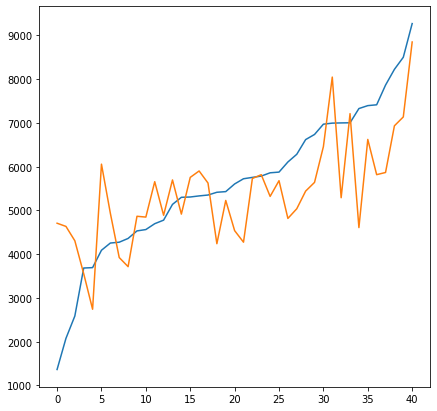

In [11]:
ind2=np.argsort(x21_volirrig)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches(7, 7)
ax.plot(yy[ind2])
ax.plot(yy_hat_lin1[ind2])
